In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("C:\\Users\\allup\\Downloads\\archive\\PlantVillage")
seed=123,
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 2 0 1 0 1 1 2 0 1]


# visualize some of the images from dataset

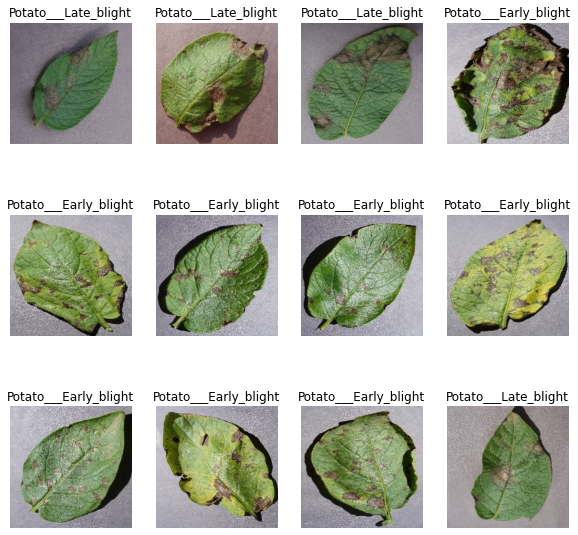

In [6]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
## split our data set in train and test data set 
len(dataset)

68

In [ ]:
80% ==> training
20% ==> 10%validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split = 0.1, test_split = 0.1, shuffle= True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# to build convalutional neural network

In [23]:
input_shape =(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_class = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_class, activation = 'softmax'),
        
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [27]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
    
)

In [28]:
 history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size= BATCH_SIZE,
    verbose= 1,
    validation_data = val_ds
)

Epoch 1/30
54/54 [==============================] - 112s 2s/step - loss: 0.9060 - accuracy: 0.5110 - val_loss: 0.8475 - val_accuracy: 0.6667
Epoch 2/30
54/54 [==============================] - 106s 2s/step - loss: 0.6735 - accuracy: 0.7170 - val_loss: 0.6116 - val_accuracy: 0.7500
Epoch 3/30
54/54 [==============================] - 104s 2s/step - loss: 0.3662 - accuracy: 0.8484 - val_loss: 0.2120 - val_accuracy: 0.9010
Epoch 4/30
54/54 [==============================] - 103s 2s/step - loss: 0.3300 - accuracy: 0.8663 - val_loss: 0.2149 - val_accuracy: 0.9219
Epoch 5/30
54/54 [==============================] - 105s 2s/step - loss: 0.2474 - accuracy: 0.9022 - val_loss: 0.2194 - val_accuracy: 0.9271
Epoch 6/30
54/54 [==============================] - 103s 2s/step - loss: 0.2413 - accuracy: 0.9045 - val_loss: 0.1260 - val_accuracy: 0.9479
Epoch 7/30
54/54 [==============================] - 101s 2s/step - loss: 0.1894 - accuracy: 0.9282 - val_loss: 0.1164 - val_accuracy: 0.9583
Epoch 8/30
54

In [29]:
scored  = model.evaluate(test_ds)

8/8 [==============================] - 6s 502ms/step - loss: 0.1872 - accuracy: 0.9375


In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

# Analyzing  the output

In [31]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

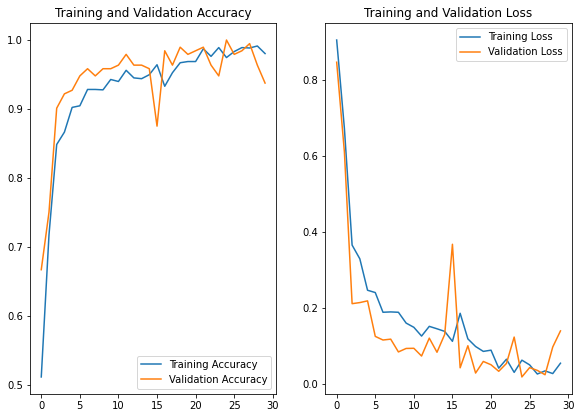

In [32]:
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS),train_acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

First Image of batch to predict :
Actucal label:  Potato___Early_blight
batch_prediction: Potato___Early_blight


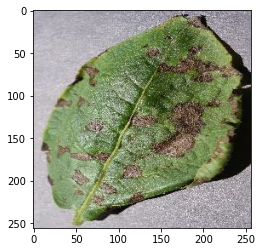

In [49]:
import numpy as np
for  images_batch, labels_batch in test_ds.take(1):
    
        first_image = images_batch[0].numpy().astype('uint8')
        first_label = labels_batch[0].numpy()
        
        print('First Image of batch to predict :')
        plt.imshow(first_image)
        print('Actucal label: ',class_names[first_label])
        
        batch_prediction = model.predict(images_batch)
        print('batch_prediction:',class_names[np.argmax(batch_prediction[0])])

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

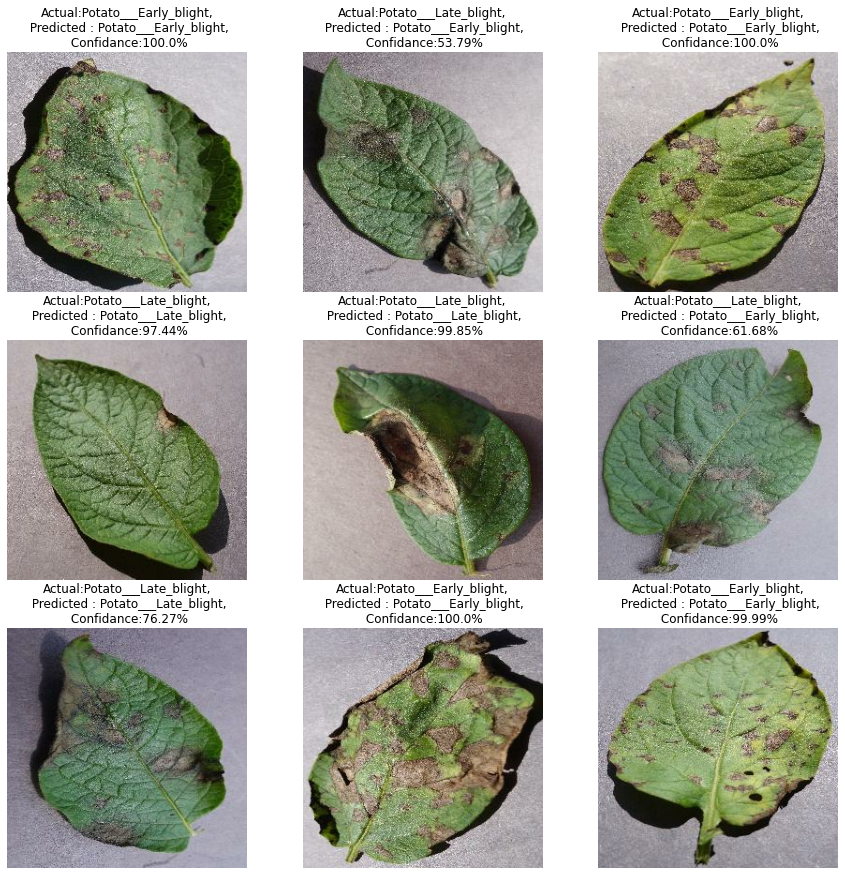

In [41]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        
        plt.title(f"Actual:{actual_class},\n Predicted : {predicted_class},\n Confidance:{confidence}%")
        
        plt.axis('off')